# Classification of Reviews Using BiLSTM

In this notebook, I will be classifying the reviews by analysing the sentiment of the reviews using BiLSTM network.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [3]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

In [4]:
from tensorflow import keras

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
pip install mlxtend

In [7]:
from mlxtend.plotting import plot_confusion_matrix

In [45]:
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/Capstone_project/reviews_preprocessed.csv',dtype='unicode',usecols = ['reviewerID','product_id','ratings','reviewcomb','ratings','clean_text'])

In [46]:
df.head()

,reviewerID,product_id,ratings,reviewcomb,clean_text
0,A11LNPG39A2ZV4,B00063M3EC,5.0,"I've been using&nbsp;<a data-hook=""product-lin...",use marvi classic strong mint toothpast year r...
1,A1VUN4JU731CBH,B00063M3EC,5.0,I had seen the Marvis toothpastes before and a...,seen marvi toothpast alway wonder world anyon ...
2,A2CBVSJ1OV2Q4S,B00063M3EC,5.0,I buy the Jasmine Marvis Toothpaste because it...,buy jasmin marvi toothpast uniqu floral scent ...
3,A34XM0ECYBB4DH,B00063M3EC,5.0,This toothpaste is the best I've ever tried. ...,toothpast best ever tri tast realli good light...
4,A2PMRY7ADA8WJ2,B00063M3EC,5.0,i didn't know what i was missing until i tried...,know miss tri toothpast make other tast artifi...


In [47]:
df.shape

(464829, 5)

In [48]:
df.isnull().sum()

reviewerID     0
product_id     0
ratings        0
reviewcomb     0
clean_text    14
dtype: int64

In [49]:
df.dropna(inplace=True)

In [50]:
df['ratings'] = df['ratings'].astype(float)

In [51]:
df['Sentiment_rating']=np.where(df.ratings>3,1,0)

df = df[df.ratings !=3]

df['Sentiment_rating'].value_counts(normalize=True)

1    0.838452
0    0.161548
Name: Sentiment_rating, dtype: float64

In [52]:
df.head()

,reviewerID,product_id,ratings,reviewcomb,clean_text,Sentiment_rating
0,A11LNPG39A2ZV4,B00063M3EC,5.0,"I've been using&nbsp;<a data-hook=""product-lin...",use marvi classic strong mint toothpast year r...,1
1,A1VUN4JU731CBH,B00063M3EC,5.0,I had seen the Marvis toothpastes before and a...,seen marvi toothpast alway wonder world anyon ...,1
2,A2CBVSJ1OV2Q4S,B00063M3EC,5.0,I buy the Jasmine Marvis Toothpaste because it...,buy jasmin marvi toothpast uniqu floral scent ...,1
3,A34XM0ECYBB4DH,B00063M3EC,5.0,This toothpaste is the best I've ever tried. ...,toothpast best ever tri tast realli good light...,1
4,A2PMRY7ADA8WJ2,B00063M3EC,5.0,i didn't know what i was missing until i tried...,know miss tri toothpast make other tast artifi...,1


In [53]:
df_orig = df.copy()

In [54]:
X = df[['clean_text']]
y=df['Sentiment_rating']

In [55]:
X.shape

(428745, 1)

In [56]:
y.shape

(428745,)

# One hot encoding

In [57]:
### Vocabulary size
vocab_size=5000

In [58]:
messages=X.copy()

In [59]:
messages['clean_text']

0         use marvi classic strong mint toothpast year r...
1         seen marvi toothpast alway wonder world anyon ...
2         buy jasmin marvi toothpast uniqu floral scent ...
3         toothpast best ever tri tast realli good light...
4         know miss tri toothpast make other tast artifi...
                                ...                        
464823    wife bought love say paint fade last longer ev...
464824    cnd shellac power polish wonder color brick kn...
464825                                 colour dark two star
464827      great product perfect shade love deep red color
464828    perfum good spray head broke spray head broke ...
Name: clean_text, Length: 428745, dtype: object

In [60]:
messages.reset_index(inplace=True)

In [24]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
corpus = []
for words in messages['clean_text']:
  corpus.append(words)

In [26]:
onehot_repr=[one_hot(words,vocab_size)for words in corpus] 
# onehot_repr

In [62]:
sentence_length=250 #100
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sentence_length)
print(embedded_docs)

[[ 446 4007   94 ...    0    0    0]
 [1647 4007  692 ...    0    0    0]
 [2164 3816 4007 ...    0    0    0]
 ...
 [4395 3352 2672 ...    0    0    0]
 [4726 4394 1492 ...    0    0    0]
 [2812 4107 2557 ...    0    0    0]]


In [63]:
embedded_docs[0]

array([ 446, 4007,   94,  348, 1650,  692, 2165, 2965,  692, 2121, 2437,
       1145, 4877,  539, 2649, 3816, 1650, 4396, 2768, 3816, 4484, 4640,
       3387, 2965,  347, 2783, 1650,  439, 3214, 2241, 4687, 3135, 3971,
       4023, 1129,  361,  875, 4748, 4751, 4388, 4614, 2768, 4396, 3152,
       4484, 3350, 4007, 2250, 1988,  692, 2449,  446, 2324,  692, 4007,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [64]:
## Creating model with one droputs
embedding_vector_features=100

model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=sentence_length))
# model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.6))
model.add(Dense(1,activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.01)
optimizer.learning_rate.assign(0.001)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 100)          500000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 400)               481600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 982,001
Trainable params: 982,001
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
len(embedded_docs),y.shape

(428745, (428745,))

In [66]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [67]:
X_final.shape,y_final.shape

((428745, 250), (428745,))

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2,stratify =y_final, random_state=42)

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.1)

In [ ]:
# early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 5)

In [69]:
### Train model
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
5360/5360 [==============================] - 284s 53ms/step - loss: 0.1998 - accuracy: 0.9235 - val_loss: 0.1397 - val_accuracy: 0.9452
Epoch 2/5
5360/5360 [==============================] - 282s 53ms/step - loss: 0.1350 - accuracy: 0.9474 - val_loss: 0.1332 - val_accuracy: 0.9478
Epoch 3/5
5360/5360 [==============================] - 281s 52ms/step - loss: 0.1188 - accuracy: 0.9544 - val_loss: 0.1283 - val_accuracy: 0.9492
Epoch 4/5
5360/5360 [==============================] - 280s 52ms/step - loss: 0.1061 - accuracy: 0.9597 - val_loss: 0.1294 - val_accuracy: 0.9499
Epoch 5/5
5360/5360 [==============================] - 279s 52ms/step - loss: 0.0946 - accuracy: 0.9642 - val_loss: 0.1314 - val_accuracy: 0.9499


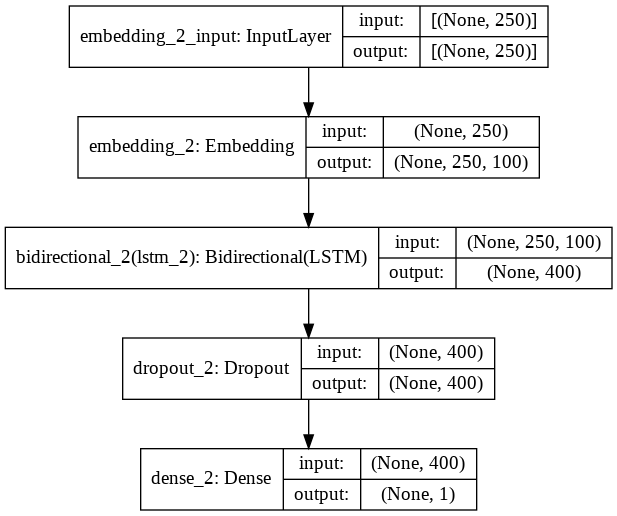

In [71]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [72]:
y_pred=(model.predict(X_test)> 0.5).astype("int32")

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y_test,y_pred)

array([[11475,  2378],
       [ 1915, 69981]])

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9499352762131337

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84     13853
           1       0.97      0.97      0.97     71896

    accuracy                           0.95     85749
   macro avg       0.91      0.90      0.91     85749
weighted avg       0.95      0.95      0.95     85749



In [77]:
history.history

{'accuracy': [0.9358709454536438,
  0.9481393098831177,
  0.9540111422538757,
  0.9585884213447571,
  0.9625709652900696],
 'loss': [0.1666833609342575,
  0.13370971381664276,
  0.11955608427524567,
  0.10849466919898987,
  0.09849508106708527],
 'val_accuracy': [0.945223867893219,
  0.9477778077125549,
  0.9492005705833435,
  0.9499236345291138,
  0.949935257434845],
 'val_loss': [0.1396857649087906,
  0.1331970989704132,
  0.1282857060432434,
  0.12941554188728333,
  0.13140125572681427]}

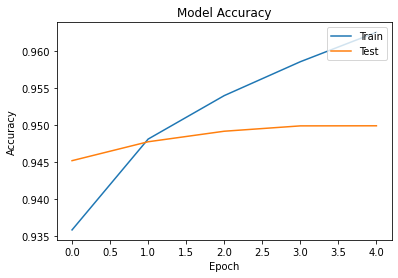

In [78]:
plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.plot(history.history['val_accuracy'],label = 'Test accuracy')
plt.title("Model Accuracy")

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc = 'upper right')
plt.show()

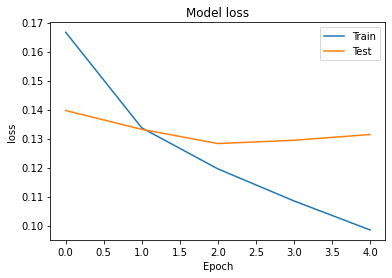

In [79]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Test loss')
plt.title("Model loss")

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train','Test'], loc = 'upper right')
plt.show()

In [151]:
import matplotlib as plt
plt.rcParams.update(plt.rcParamsDefault)

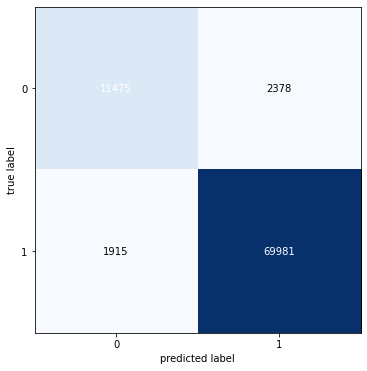

In [80]:
mat = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = mat, figsize = (6,6),  show_normed =False)



In [81]:
2378/(2378+11475)

0.17165956832455065

Though the model seems to be overfitting, the precision is better compared to the sklearn's models. The FPR is 0.162 as opposed to 0.29 for logitic regression with TFIDF vectorizer.